In [23]:
# 获取数据
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz
data = pd.read_table('gouwu.txt', sep='\t', engine="python", encoding='utf-8')
data.columns.values
data.head()

,购物距离注册时长,购物时是否咨询客服,是否团购,是否是新用户,是否直降,是否换购,是够满减,是否买赠,是够加价购,留存标签,咨询数量,同时购买同样物品数量
0,102,0,1,0,0,0,0,0,0,1,0,0
1,102,0,0,0,0,0,0,0,0,1,0,0
2,37,1,0,0,0,0,0,0,1,1,0,2
3,12,0,0,0,0,0,0,0,0,1,0,2
4,29,0,0,1,0,0,0,0,0,1,0,2


In [24]:
from sklearn.model_selection import train_test_split
data_x = data.drop(['留存标签'], axis=1)
data_y = data['留存标签']
train_x, test_x, train_y, test_y = train_test_split(data_x,
                                                    data_y,
                                                    test_size=0.1,
                                                    random_state=8)

In [43]:
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=7,
                             min_samples_split=4,
                             class_weight='balanced',
                             random_state=0)
clf.fit(train_x, train_y)
score = clf.score(test_x, test_y)
score

# DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
#                        max_depth=8, min_samples_split=4)

0.7667785234899329

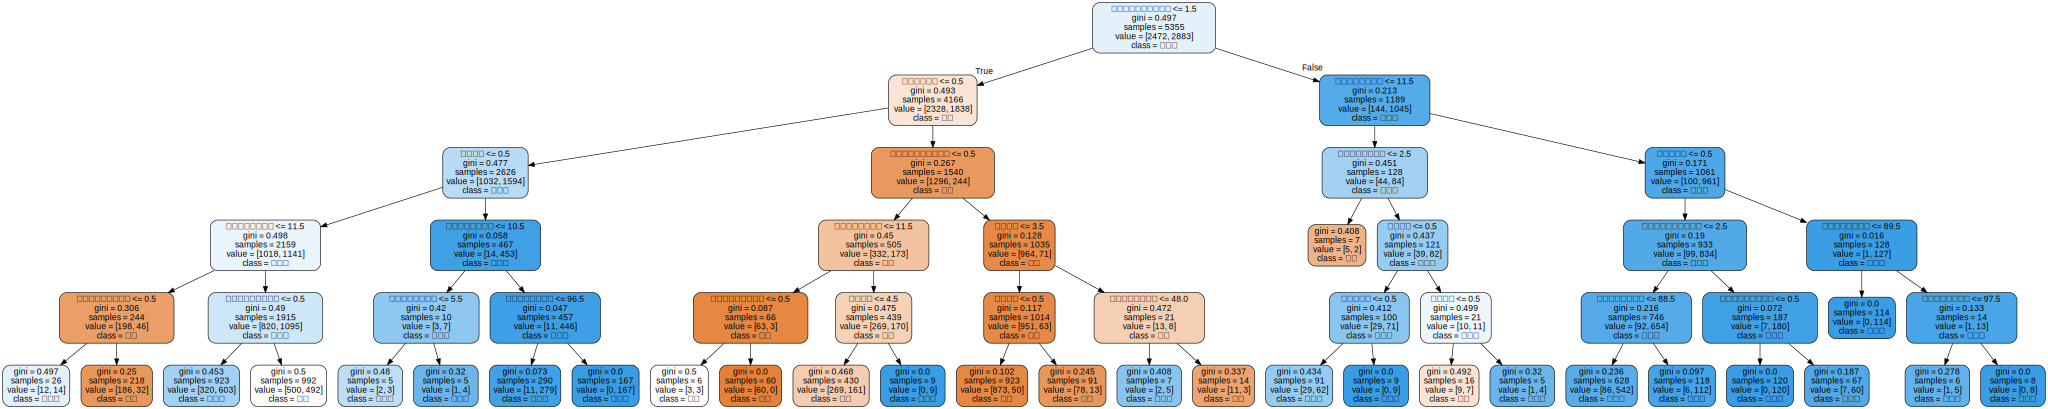

In [29]:
import os

plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文标签
plt.rcParams["font.family"] = 'Arial Unicode MS'  # mac
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
from sklearn import tree
#颜色越浅，不纯度越高
dot = tree.export_graphviz(clf,
                           feature_names=train_x.columns,
                           class_names=['留存', '非留存'],
                           filled=True,
                           rounded=True)
graph = graphviz.Source(dot)
graph

In [37]:
#网格搜索
from sklearn.model_selection import cross_val_score, GridSearchCV
paramaters = {
    'criterion': ('gini', 'entropy'),
    'min_samples_split': [2, 3, 4, 5],
    'max_depth': range(1, 10),
    'class_weight': ('balanced', None)
}

#               'presort':(False,True)

tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, paramaters)
gsearch.fit(train_x, train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ('balanced', None),
                         'criterion': ('gini', 'entropy'),
                         'max_depth': range(1, 10),
                         'min_samples_split': [2, 3, 4, 5]})

In [38]:
model = gsearch.best_estimator_
model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_split=4)

In [44]:
score = model.score(train_x,train_y)
score

0.7930905695611578

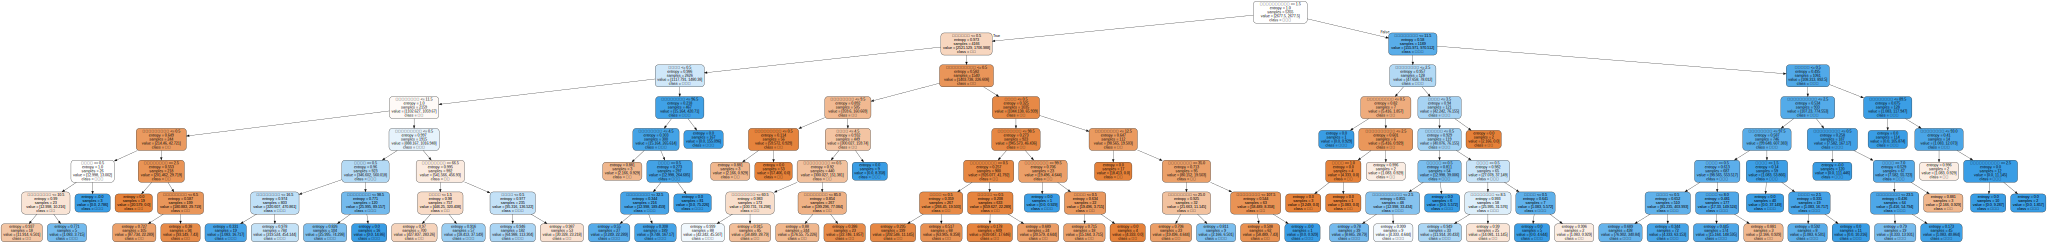

In [45]:
import os

from sklearn import tree
#颜色越浅，不纯度越高
dot = tree.export_graphviz(clf,
                           feature_names=train_x.columns,
                           class_names=['留存', '非留存'],
                           filled=True,
                           rounded=True)
graph = graphviz.Source(dot)
graph

In [46]:
model.feature_importances_

array([0.15477595, 0.03955245, 0.14110686, 0.27304339, 0.00283462,
       0.        , 0.01056098, 0.        , 0.01225129, 0.03892561,
       0.32694886])

In [47]:
[*zip(train_x.columns,clf.feature_importances_)]


[('购物距离注册时长', 0.13289816084662873),
 ('购物时是否咨询客服', 0.0367275408575347),
 ('是否团购', 0.14852476441620335),
 ('是否是新用户', 0.28739712390653455),
 ('是否直降', 0.0005766878777182696),
 ('是否换购', 0.0),
 ('是够满减', 0.005192454022486492),
 ('是否买赠', 0.0),
 ('是够加价购', 0.011701350234669282),
 ('咨询数量', 0.03428768992972958),
 ('同时购买同样物品数量', 0.342694227908495)]

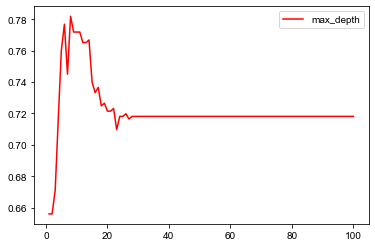

In [48]:
#用学习曲线确定最优max_depth取值
test = []
for i in range(100):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=30
                                      ,splitter="random"
                                     )
    clf = clf.fit(train_x,train_y)
    score = clf.score(test_x,test_y)
    test.append(score)
plt.plot(range(1,101),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [49]:
import shap
# shap.initjs()
# 丢进树解释器中
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_x)
print(shap_values)

[array([[-0.02315561, -0.02497118,  0.02576781, ..., -0.09148507,
         0.00663341, -0.32462856],
       [ 0.04265364,  0.0747681 ,  0.06660495, ...,  0.00192069,
         0.01830853,  0.10966018],
       [ 0.19700569,  0.02412849,  0.03275755, ...,  0.01293979,
        -0.00325237, -0.41849716],
       ...,
       [-0.00956416, -0.03400764,  0.03002978, ...,  0.01185698,
         0.01487989, -0.25505765],
       [-0.0407385 ,  0.06275766, -0.11292488, ...,  0.00189269,
         0.01164157, -0.01029645],
       [-0.04409986,  0.05726257,  0.02393116, ...,  0.00193042,
         0.01235144, -0.00530262]]), array([[ 0.02315561,  0.02497118, -0.02576781, ...,  0.09148507,
        -0.00663341,  0.32462856],
       [-0.04265364, -0.0747681 , -0.06660495, ..., -0.00192069,
        -0.01830853, -0.10966018],
       [-0.19700569, -0.02412849, -0.03275755, ..., -0.01293979,
         0.00325237,  0.41849716],
       ...,
       [ 0.00956416,  0.03400764, -0.03002978, ..., -0.01185698,
        

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


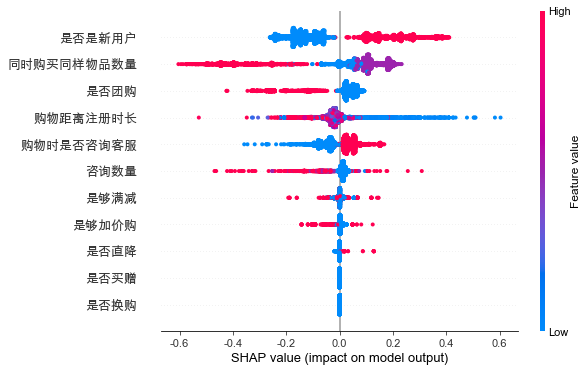

In [50]:
plt.rcParams['font.sans-serif'] = ['SimHei']     # win
plt.rcParams["font.family"] = 'Arial Unicode MS' # mac
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

shap.summary_plot(shap_values[0],train_x,max_display=30)
#红色高 蓝色低

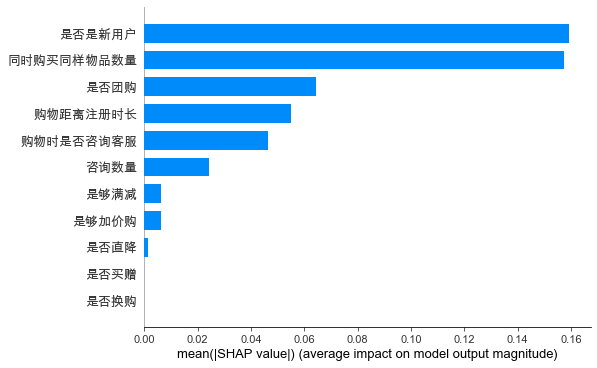

In [51]:
#显示
shap.summary_plot(shap_values[1], train_x, plot_type="bar")

0.8176688762626263
231


[<matplotlib.lines.Line2D at 0x7fa445586c10>]

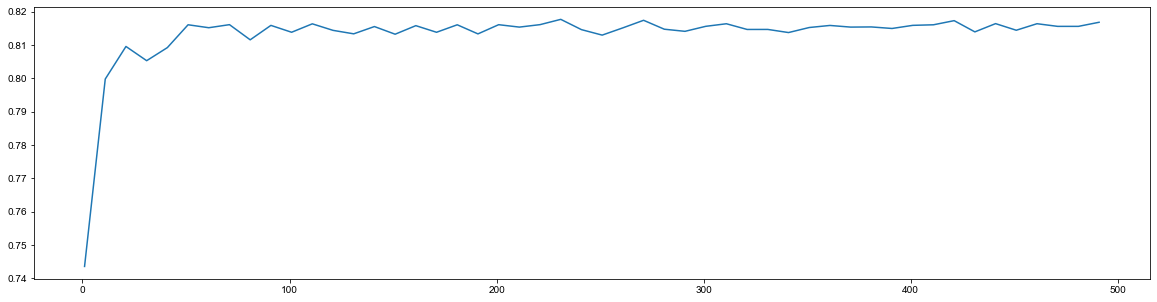

In [15]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

score = []
# 确定森林的数目
for i in range(1, 500, 10):
    model = RandomForestClassifier(n_estimators=i,
                                   criterion='gini',
                                   bootstrap=True)
    model.fit(train_x, train_y)
    rf_predictions = model.predict(test_x)
    rf_probs = model.predict_proba(test_x)[:, 1]
    roc_value = roc_auc_score(test_y, rf_probs)
    score.append(roc_value)

# 确定范围
import matplotlib.pyplot as plt
print(max(score))
print(score.index(max(score)) * 10 + 1)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 500, 10), score)

In [16]:
# 提炼特征，使用自带的函数计算得出的，只有大小，没有方向性
model2 = RandomForestClassifier(n_estimators=150,
                                criterion='gini',
                                bootstrap=True).fit(test_x, test_y)
pred1 = model2.predict(test_x)
acc = (test_y == pred1).mean()
print('accuracy', acc)

accuracy 0.9697986577181208


In [17]:
model2.feature_importances_

array([0.47267868, 0.05529222, 0.04097649, 0.12081772, 0.00835315,
       0.        , 0.02105103, 0.        , 0.01605088, 0.05683211,
       0.20794772])

In [18]:
[*zip(train_x.columns, model2.feature_importances_)]

[('购物距离注册时长', 0.472678678042244),
 ('购物时是否咨询客服', 0.05529222056705256),
 ('是否团购', 0.040976489989659456),
 ('是否是新用户', 0.1208177167218845),
 ('是否直降', 0.008353148127554862),
 ('是否换购', 0.0),
 ('是够满减', 0.021051028872689625),
 ('是否买赠', 0.0),
 ('是够加价购', 0.016050880267704095),
 ('咨询数量', 0.05683211278190387),
 ('同时购买同样物品数量', 0.20794772462930702)]

In [19]:
import shap
# shap.initjs()
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(train_x,check_additivity=False)
print(shap_values)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


[array([[-0.09236254, -0.05006886,  0.01797941, ..., -0.00122672,
        -0.01009069, -0.22168015],
       [ 0.13940063,  0.14121123,  0.05066862, ...,  0.01296184,
         0.00176623,  0.22986647],
       [ 0.03439414,  0.02954829,  0.01461858, ...,  0.0009701 ,
        -0.0295809 , -0.32700726],
       ...,
       [-0.10032698, -0.09434064,  0.01008472, ..., -0.00571109,
        -0.01996509, -0.1713034 ],
       [ 0.16745436,  0.05758271, -0.11021592, ...,  0.00190156,
         0.01891486,  0.05810815],
       [-0.06875909,  0.03674892,  0.02354841, ..., -0.00245564,
         0.02293108,  0.03680636]]), array([[ 0.09236254,  0.05006886, -0.01797941, ...,  0.00122672,
         0.01009069,  0.22168015],
       [-0.13940063, -0.14121123, -0.05066862, ..., -0.01296184,
        -0.00176623, -0.22986647],
       [-0.03439414, -0.02954829, -0.01461858, ..., -0.0009701 ,
         0.0295809 ,  0.32700726],
       ...,
       [ 0.10032698,  0.09434064, -0.01008472, ...,  0.00571109,
        

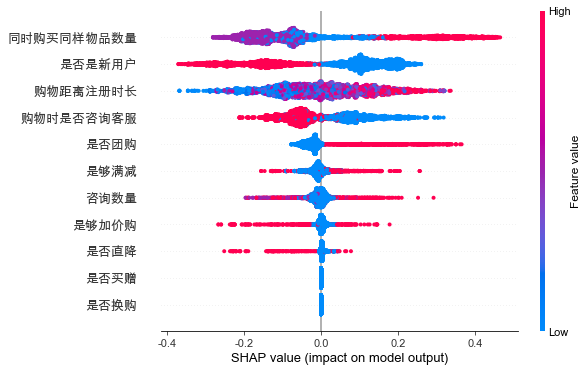

In [20]:
shap.summary_plot(shap_values[1],train_x,max_display=30)
#红色高 蓝色低90

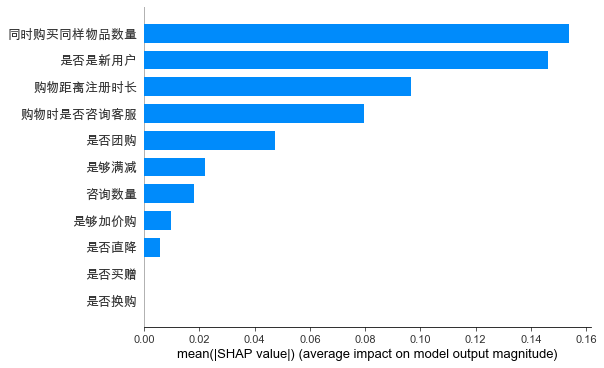

In [22]:
#显示
shap.summary_plot(shap_values[1], train_x, plot_type="bar")